# LSTM using keras
## (外生変数の取り入れができていない)



<Axes: >

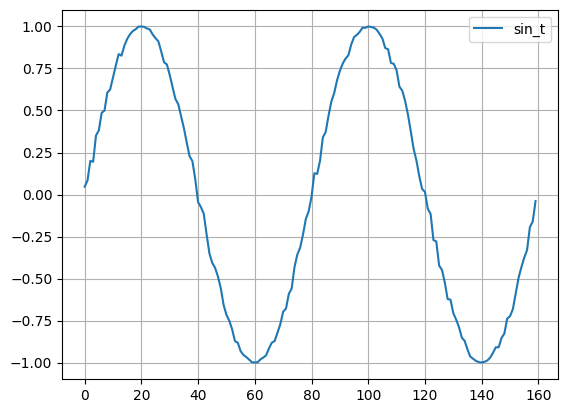

In [68]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

# サイクルあたりのステップ数
steps_per_cycle = 80

# 生成するサイクル数
number_of_cycles = 50

# データフレームの作成
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])

# 一様乱数でノイズを発生させたsin波を生成
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle) + random.uniform(-0.05, +0.05)))

# 2サイクルだけ抽出してプロット
df[["sin_t"]].head(steps_per_cycle * 2).plot(grid=True)

# 画像の保存 (コメントアウト)
# plt.savefig('img_20190505085043.png')


$$ step : degree $$

$$ 80:2\pi $$

$$ 1: \frac{2\pi}{80} $$

In [69]:
# データの前処理と分割
def _load_data(data, n_prev=30):
    docX, docY = [], []

    for i in range(len(data) - n_prev):
        docX.append(data.iloc[i:i + n_prev].values)  # docX: [[30個のデータ],[30個のデータ],[30個のデータ],[30個のデータ]]
        docY.append(data.iloc[i + n_prev].values)  # docY: [○,○,○,○,] （○:31個目のデータ(???))

    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY


def train_test_split(df, test_size=0.1, n_prev=30):
    ntrn = round(len(df) * (1 - test_size))  # 小数点第一位の位で四捨五入(切り上げ・切り下げ)をする　→整数になる．
    ntrn = int(ntrn)

    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)


In [70]:
# モデル構築と学習
from tensorflow import keras
from keras.layers import Dense, Activation, LSTM

# パラメータ
in_out_neurons = 1
hidden_neurons = 300
length_of_sequences = 30

(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], test_size=0.1, n_prev=30)

model = Sequential()
model.add(
    LSTM(
        hidden_neurons,
        input_shape=(length_of_sequences, in_out_neurons),  # LSTMレイヤへの入力形状を修正
        return_sequences=False,
    )
)
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, epochs=15, validation_split=0.05)



Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.2459 - val_loss: 0.0892
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0427 - val_loss: 0.0107
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0106 - val_loss: 0.0079
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0080 - val_loss: 0.0059
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0076 - val_loss: 0.0203
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0138 - val_loss: 0.0074
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0070 - val_loss: 0.0083
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0090 - val_loss: 0.0031
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.0035 - val_loss: 0.0120
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0081 - val_loss: 0.0097
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0086 - val_loss: 0.0033


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


<Axes: >

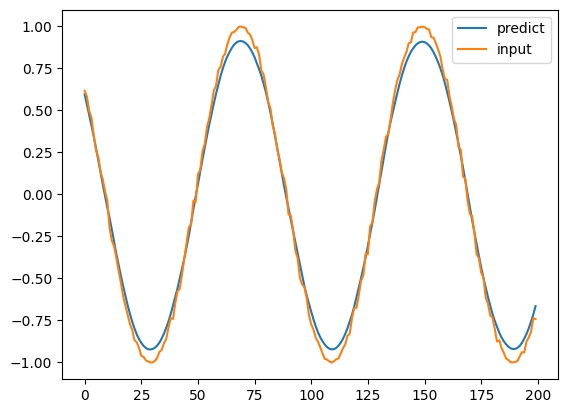

In [71]:
# 予測
predicted = model.predict(X_test)

# 描写
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot()
